Part 1.                    **General Labor Force Participation Rate**


In this part i want to analyze general insights about this dataset which include:

How has the labor force participation rate?

Are there notable differences between male and female participation?

Which age groups contribute the most to the labor force?

How does education level impact labor force participation?


Add dataset with necessray imports and review.

In [180]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
file_path = "dataset.xls"

df = pd.read_excel(file_path, sheet_name='2.1.') #read labor force sheet
df.head



<bound method NDFrame.head of                                         2. Labor force Unnamed: 1  \
0    2.1 Population by labor force participation st...        NaN   
1                                               people              
2                                                  NaN    Total\n   
3                                                  NaN        NaN   
4                                                  NaN        NaN   
..                                                 ...        ...   
101                                              29-34     364089   
102                                              35-44     483758   
103                                              45-54     414706   
104                                              55-64     363791   
105                                       65 and older     384799   

                           Unnamed: 2             Unnamed: 3  \
0                                 NaN                    NaN   
1            

Here we have uncleaned data that be very hard to read and do further work so we need do clean and remove some rows

In [ ]:
# Load and clean '2.1.' sheet

file_path = "dataset.xls" 
df_21 = pd.read_excel(file_path, sheet_name='2.1.', skiprows=5) 

df_21.columns = df_21.iloc[0].values  
df_21 = df_21[1:].reset_index(drop=True)

df_21.head(10)


,All population\n,NaN,NaN,NaN,NaN,NaN
0,All population,14148747.0,9645294,9197046,448248,4503453.0
1,"including age, years:",NaN,NaN,NaN,NaN,NaN
2,15,144815.0,45,45,-,144770.0
3,16-24,2223180.0,956868,920166,36702,1266312.0
4,25-28,911821.0,816660,795832,20828,95161.0
5,29-34,2118362.0,1964927,1900801,64126,153435.0
6,35-44,3008950.0,2777723,2617372,160351,231227.0
7,45-54,2058123.0,1882181,1785626,96555,175942.0
8,55-64,1724842.0,1154920,1085234,69686,569922.0
9,65 and older,1958654.0,91970,91970,-,1866684.0


In [183]:
df_21.columns = ["Category", "Total Population", "Labor Force", "Employed", "Unemployed", "Not in Labor Force"]

total_population = df_21.iloc[0]["Total Population"]
labor_force = df_21.iloc[0]["Labor Force"]
participation_rate = (labor_force / total_population) * 100



male_participation = (df_21.iloc[11]["Labor Force"] / df_21.iloc[0]["Labor Force"]) * 100
female_participation = (df_21.iloc[22]["Labor Force"] / df_21.iloc[0]["Labor Force"]) * 100

age_groups = df_21.iloc[3:10][["Category", "Labor Force"]].dropna()  # Selecting only age-related rows

most_age = (df_21.iloc[6]["Labor Force"]/ df_21.iloc[0]["Labor Force"]) *100

most_age, male_participation, female_participation, participation_rate


(28.798738535082496, 51.60258463868493, 48.39741536131506, 68.17065850424775)

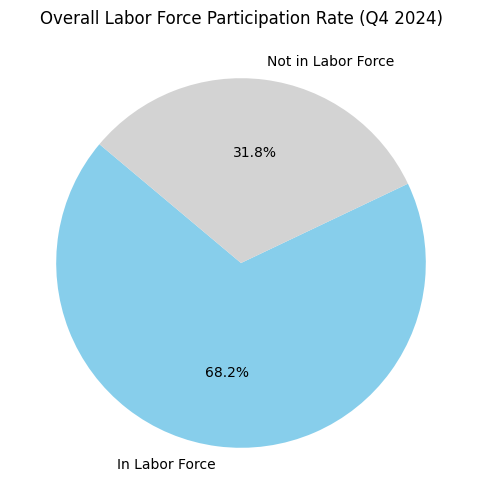

In [184]:
plt.figure(figsize=(6, 6))
plt.pie([participation_rate, 100 - participation_rate], labels=["In Labor Force", "Not in Labor Force"],
        autopct='%1.1f%%', colors=["skyblue", "lightgray"], startangle=140)
plt.title("Overall Labor Force Participation Rate (Q4 2024)")
plt.show()

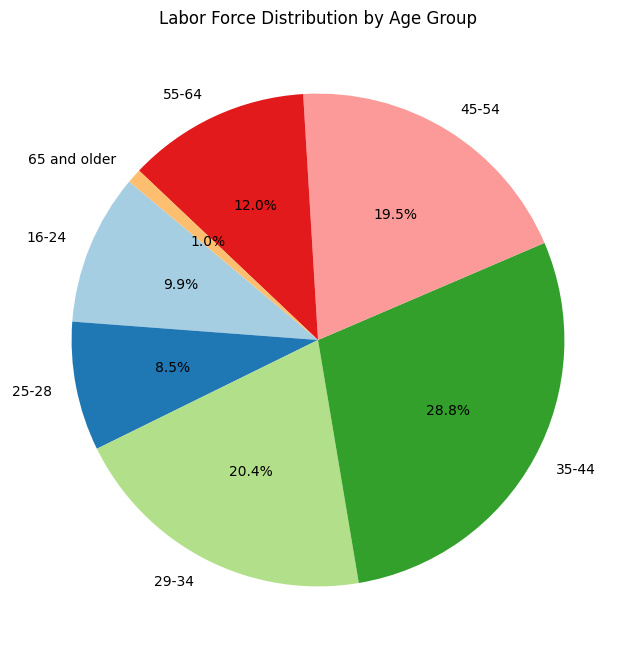

In [185]:
age_groups = df_21.iloc[3:10][["Category", "Labor Force"]].dropna()
labels = age_groups["Category"]
sizes = age_groups["Labor Force"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Labor Force Distribution by Age Group")
plt.show()

C:\Users\alizh\AppData\Local\Temp\ipykernel_10548\817868988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Male", "Female"], y=[male_participation, female_participation], palette=["blue", "pink"])


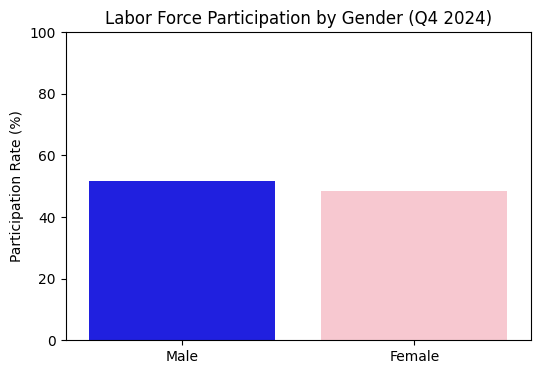

In [186]:
plt.figure(figsize=(6, 4))
sns.barplot(x=["Male", "Female"], y=[male_participation, female_participation], palette=["blue", "pink"])
plt.ylabel("Participation Rate (%)")
plt.title("Labor Force Participation by Gender (Q4 2024)")
plt.ylim(0, 100)
plt.show()

In [187]:
file_path = "dataset.xls" 
df_22 = pd.read_excel(file_path, sheet_name='2.2', skiprows=5) 

df_22.columns = df_22.iloc[0].values  
df_22 = df_22[1:].reset_index(drop=True)

df_edu = df_22.iloc[:, :3]  
df_edu.columns = ["Education Level", "Labor Force", "Employed Population"]

df_edu["Labor Force"] = pd.to_numeric(df_edu["Labor Force"], errors="coerce")
df_edu["Employed Population"] = pd.to_numeric(df_edu["Employed Population"], errors="coerce")

df_edu = df_edu.dropna()

df_edu


,Education Level,Labor Force,Employed Population
0,higher and postgraduate education,4749601.0,4072968.0
1,technical and vocational education,2298391.0,2015419.0
2,secondary vocational (special) education,4214802.0,2788666.0
3,initial vocational education,323224.0,196830.0
4,secondary general education,2055326.0,540147.0
...,...,...,...
76,secondary vocational (special) education,780015.0,500833.0
77,initial vocational education,70262.0,43389.0
78,secondary general education,539379.0,186176.0
79,basic secondary education,100324.0,8231.0


C:\Users\alizh\AppData\Local\Temp\ipykernel_10548\3981361970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_groups["Category"], y=age_groups["Labor Force"], palette="viridis")


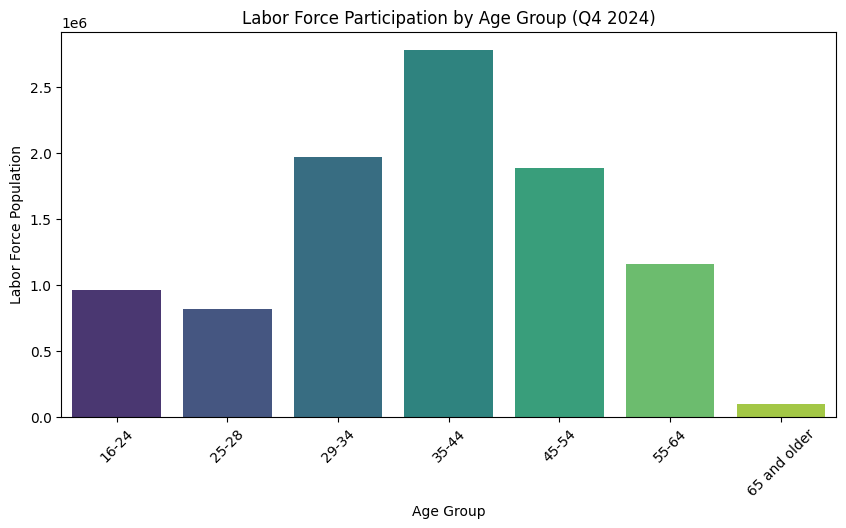

In [188]:
plt.figure(figsize=(10, 5))
sns.barplot(x=age_groups["Category"], y=age_groups["Labor Force"], palette="viridis")
plt.xlabel("Age Group")
plt.ylabel("Labor Force Population")
plt.title("Labor Force Participation by Age Group (Q4 2024)")
plt.xticks(rotation=45)
plt.show()

C:\Users\alizh\AppData\Local\Temp\ipykernel_10548\405950055.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_edu["Education Level"], y=df_edu["Labor Force"], palette="mako")


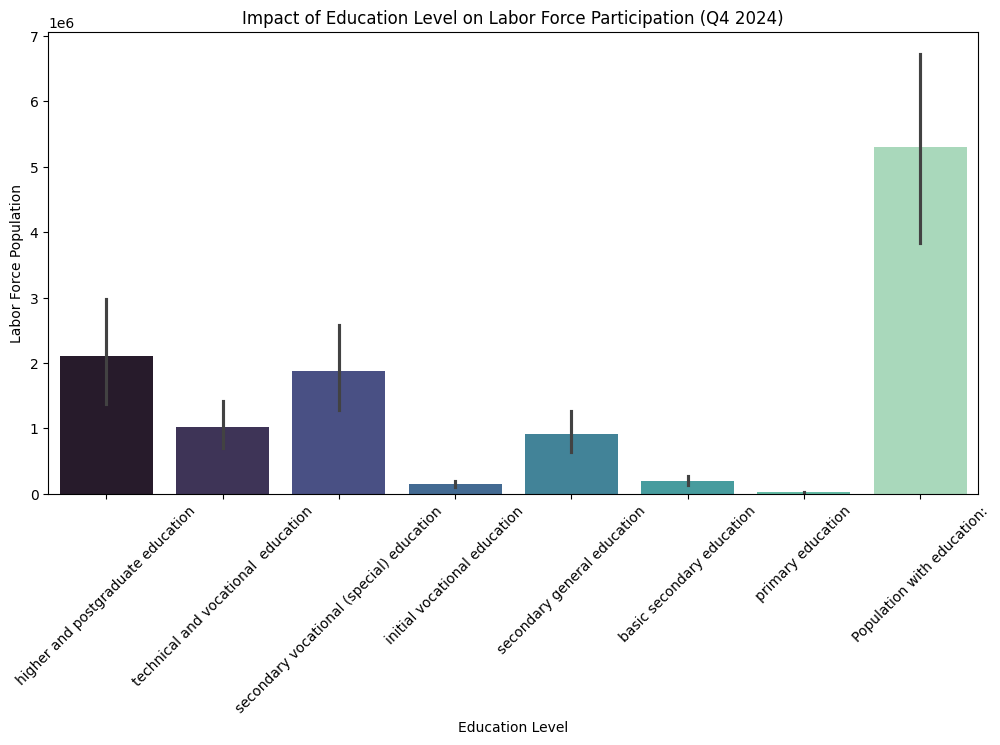

In [189]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_edu["Education Level"], y=df_edu["Labor Force"], palette="mako")
plt.xlabel("Education Level")
plt.ylabel("Labor Force Population")
plt.title("Impact of Education Level on Labor Force Participation (Q4 2024)")
plt.xticks(rotation=45)
plt.show()


Total review of part 1:

1.We have in total 14 148 747 people total including 9 645 294 labor force and 4 503 453 persons that cant include in this list.In pie chart we can see thats 68.2 percent of labor force and 31.8 percent of not in labor in this number included persons like: Study(daytime), housekeeping, retirement, and for health reasons.

2.There is no significant gap between male and female labor force. Mans is slightly higher by 3.21 percent although total population of woman is higher.

3.Age group most contributed in labor force is middle age between 35-44 which is 28.8 percent of total labor force, second is age between 29-34.

4.And lastly it shows that population with higher and postgraduate education is most likely will be employed it shows that 3 927 387 is employed and people with secondary education in second place 2 626 644

Part 2
